In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [55]:
scaler = MinMaxScaler()

In [10]:
tron = pd.read_csv('TRX-USD.csv')

In [11]:
tron.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.002304,0.002438,0.002285,0.002344,0.002344,2924350
1,2017-11-10,0.002335,0.002350,0.001989,0.002013,0.002013,2193620
2,2017-11-11,0.002026,0.002298,0.001890,0.002003,0.002003,1748460
3,2017-11-12,0.002006,0.002006,0.001684,0.001783,0.001783,2174370
4,2017-11-13,0.001795,0.002146,0.001771,0.002112,0.002112,2889150


In [12]:
tron['Date'] = pd.to_datetime(tron.Date)

In [13]:
tron.set_index('Date', inplace = True)

In [14]:
tron.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.002304,0.002438,0.002285,0.002344,0.002344,2924350
2017-11-10,0.002335,0.002350,0.001989,0.002013,0.002013,2193620
2017-11-11,0.002026,0.002298,0.001890,0.002003,0.002003,1748460
2017-11-12,0.002006,0.002006,0.001684,0.001783,0.001783,2174370
2017-11-13,0.001795,0.002146,0.001771,0.002112,0.002112,2889150


In [15]:
tron.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-06,0.074580,0.087789,0.073170,0.086175,0.086175,3585606184
2022-05-07,0.086243,0.087882,0.080489,0.083265,0.083265,3071282411
2022-05-08,0.083295,0.090869,0.080685,0.087527,0.087527,2832185588
2022-05-09,0.087550,0.087821,0.072672,0.073263,0.073263,2918306329
2022-05-10,0.073154,0.081976,0.072121,0.078533,0.078533,3113926912


In [29]:
len(tron)

1644

In [30]:
from statsmodels.tsa.stattools import adfuller

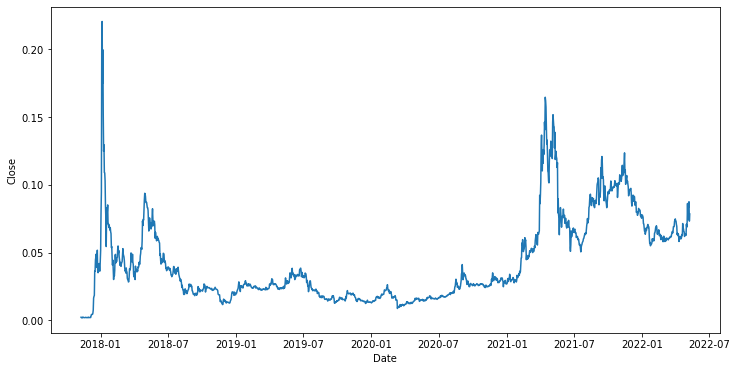

In [33]:
plt.figure(figsize = (12,6))
g = sns.lineplot(x = 'Date', y = 'Close',data = tron)

<AxesSubplot:xlabel='Date'>

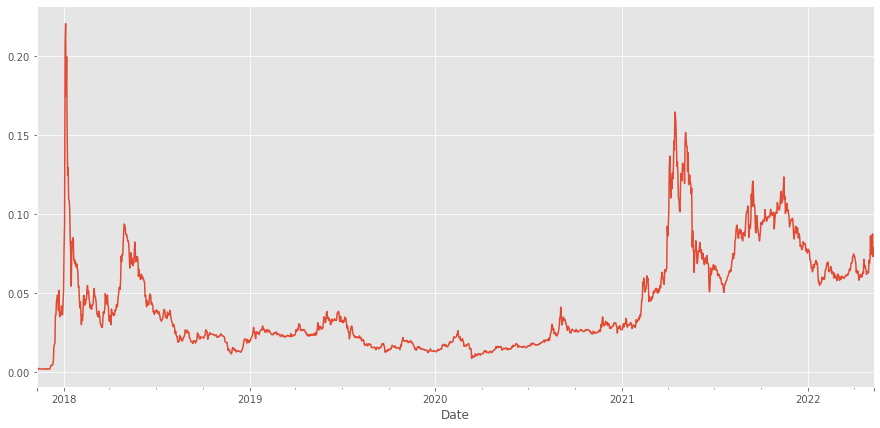

In [38]:
tron['Close'].plot(figsize = (15,7))

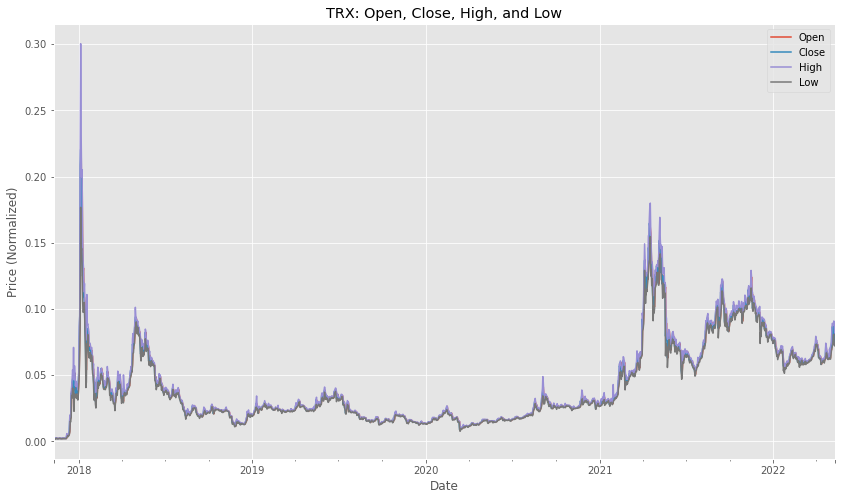

In [49]:
tron[['Open','Close','High','Low']].plot(figsize = (14,8))
plt.title('TRX: Open, Close, High, and Low')
plt.ylabel('Price (Normalized)')
plt.show()

In [68]:
trx = pd.DataFrame(tron['Close'])

In [69]:
trx = pd.DataFrame(scaler.fit_transform(trx), columns = trx.columns, index = trx.index)

In [70]:
trx.head()

,Close
Date,
2017-11-09,0.002564
2017-11-10,0.001051
2017-11-11,0.001006
2017-11-12,0.000000
2017-11-13,0.001504


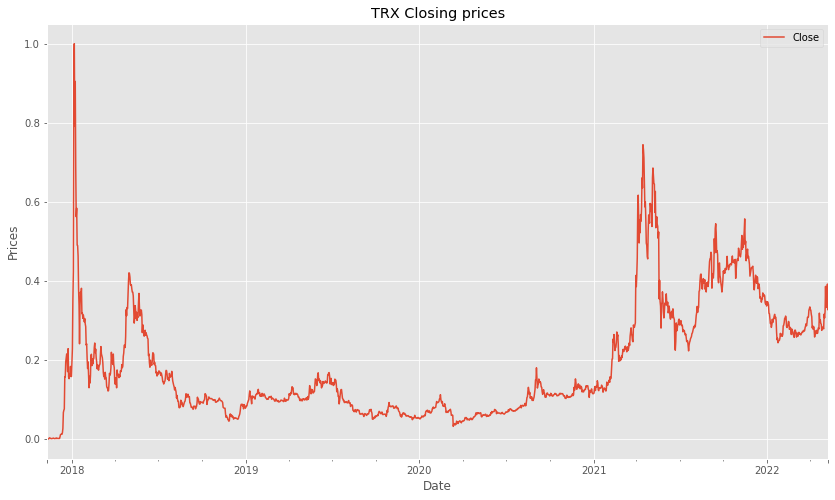

In [71]:
trx.plot(figsize = (14,8))
plt.title('TRX Closing prices')
plt.ylabel('Prices')
plt.show()

In [72]:
def split_sequence(seq, n_steps_in, n_steps_out):
    
    X,y = [],[]
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x,seq_y = seq[i:end],seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X),np.array(y)

In [73]:
def visualize_training_results(results):
    history = results.history
    plt.figure(figsize = (12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize = (12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [74]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences = True))
        try:
            if x%drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [75]:
n_per_in = 30

n_per_out = 10

n_features = 1

X,y = split_sequence(list(trx.Close), n_per_in, n_per_out)

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [76]:
model = Sequential()

activ = 'softsign'

model.add(LSTM(30, activation=activ, 
               return_sequences = True, input_shape=(n_per_in, n_features)))

layer_maker(n_layers = 6, n_nodes = 12, activation = activ)

model.add(LSTM(10, activation = activ))

model.add(Dense(n_per_out))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 30)            3840      
                                                                 
 lstm_9 (LSTM)               (None, 30, 12)            2064      
                                                                 
 lstm_10 (LSTM)              (None, 30, 12)            1200      
                                                                 
 lstm_11 (LSTM)              (None, 30, 12)            1200      
                                                                 
 lstm_12 (LSTM)              (None, 30, 12)            1200      
                                                                 
 lstm_13 (LSTM)              (None, 30, 12)            1200      
                                                                 
 lstm_14 (LSTM)              (None, 30, 12)           

In [77]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [78]:
res = model.fit(X,y, epochs = 500, batch_size = 32, validation_split = 0.1)

Epoch 1/500
46/46 [==============================] - 13s 87ms/step - loss: 0.0326 - accuracy: 0.0658 - val_loss: 0.0278 - val_accuracy: 0.0683
Epoch 2/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0188 - accuracy: 0.0706 - val_loss: 0.0057 - val_accuracy: 0.0559
Epoch 3/500
46/46 [==============================] - 3s 67ms/step - loss: 0.0099 - accuracy: 0.1060 - val_loss: 0.0027 - val_accuracy: 0.1801
Epoch 4/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0082 - accuracy: 0.0796 - val_loss: 0.0051 - val_accuracy: 0.0807
Epoch 5/500
46/46 [==============================] - 3s 71ms/step - loss: 0.0068 - accuracy: 0.0886 - val_loss: 0.0026 - val_accuracy: 0.0807
Epoch 6/500
46/46 [==============================] - 3s 69ms/step - loss: 0.0061 - accuracy: 0.0997 - val_loss: 0.0020 - val_accuracy: 0.1615
Epoch 7/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0058 - accuracy: 0.0983 - val_loss: 0.0017 - val_accuracy: 0.1677
Epoch

46/46 [==============================] - 3s 68ms/step - loss: 0.0019 - accuracy: 0.1136 - val_loss: 0.0022 - val_accuracy: 0.1491
Epoch 59/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0019 - accuracy: 0.1267 - val_loss: 0.0023 - val_accuracy: 0.0994
Epoch 60/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0018 - accuracy: 0.1150 - val_loss: 0.0043 - val_accuracy: 0.1180
Epoch 61/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0020 - accuracy: 0.1150 - val_loss: 0.0017 - val_accuracy: 0.1118
Epoch 62/500
46/46 [==============================] - 3s 68ms/step - loss: 0.0018 - accuracy: 0.1309 - val_loss: 0.0021 - val_accuracy: 0.1118
Epoch 63/500
46/46 [==============================] - 3s 70ms/step - loss: 0.0018 - accuracy: 0.1406 - val_loss: 0.0017 - val_accuracy: 0.1615
Epoch 64/500
46/46 [==============================] - 3s 69ms/step - loss: 0.0016 - accuracy: 0.1316 - val_loss: 0.0018 - val_accuracy: 0.1180
Epoch 65/500

Epoch 115/500
46/46 [==============================] - 3s 66ms/step - loss: 9.2740e-04 - accuracy: 0.1343 - val_loss: 0.0014 - val_accuracy: 0.1801
Epoch 116/500
46/46 [==============================] - 3s 69ms/step - loss: 8.3416e-04 - accuracy: 0.1316 - val_loss: 0.0014 - val_accuracy: 0.1429
Epoch 117/500
46/46 [==============================] - 3s 67ms/step - loss: 8.4943e-04 - accuracy: 0.1420 - val_loss: 0.0016 - val_accuracy: 0.1677
Epoch 118/500
46/46 [==============================] - 3s 67ms/step - loss: 0.0010 - accuracy: 0.1198 - val_loss: 0.0015 - val_accuracy: 0.1553
Epoch 119/500
46/46 [==============================] - 3s 67ms/step - loss: 0.0011 - accuracy: 0.1316 - val_loss: 0.0012 - val_accuracy: 0.1118
Epoch 120/500
46/46 [==============================] - 3s 67ms/step - loss: 0.0012 - accuracy: 0.1281 - val_loss: 0.0021 - val_accuracy: 0.1925
Epoch 121/500
46/46 [==============================] - 3s 67ms/step - loss: 8.7092e-04 - accuracy: 0.1482 - val_loss: 0.0015

46/46 [==============================] - 3s 68ms/step - loss: 6.5854e-04 - accuracy: 0.1413 - val_loss: 0.0018 - val_accuracy: 0.1429
Epoch 171/500
46/46 [==============================] - 3s 68ms/step - loss: 8.6302e-04 - accuracy: 0.1226 - val_loss: 0.0016 - val_accuracy: 0.1429
Epoch 172/500
46/46 [==============================] - 3s 68ms/step - loss: 9.9213e-04 - accuracy: 0.1461 - val_loss: 0.0016 - val_accuracy: 0.1491
Epoch 173/500
46/46 [==============================] - 3s 69ms/step - loss: 7.2213e-04 - accuracy: 0.1260 - val_loss: 0.0020 - val_accuracy: 0.1491
Epoch 174/500
46/46 [==============================] - 3s 69ms/step - loss: 6.2022e-04 - accuracy: 0.1614 - val_loss: 0.0021 - val_accuracy: 0.1988
Epoch 175/500
46/46 [==============================] - 3s 69ms/step - loss: 9.1947e-04 - accuracy: 0.1517 - val_loss: 0.0012 - val_accuracy: 0.0994
Epoch 176/500
46/46 [==============================] - 3s 68ms/step - loss: 7.4256e-04 - accuracy: 0.1530 - val_loss: 0.0014 -

46/46 [==============================] - 3s 68ms/step - loss: 6.5814e-04 - accuracy: 0.1634 - val_loss: 0.0016 - val_accuracy: 0.1553
Epoch 226/500
46/46 [==============================] - 3s 70ms/step - loss: 0.0012 - accuracy: 0.1350 - val_loss: 0.0013 - val_accuracy: 0.0807
Epoch 227/500
46/46 [==============================] - 3s 70ms/step - loss: 7.0239e-04 - accuracy: 0.1627 - val_loss: 0.0021 - val_accuracy: 0.1304
Epoch 228/500
46/46 [==============================] - 3s 69ms/step - loss: 6.0118e-04 - accuracy: 0.1759 - val_loss: 0.0016 - val_accuracy: 0.2050
Epoch 229/500
46/46 [==============================] - 3s 69ms/step - loss: 5.4826e-04 - accuracy: 0.1807 - val_loss: 0.0016 - val_accuracy: 0.1677
Epoch 230/500
46/46 [==============================] - 3s 69ms/step - loss: 5.3492e-04 - accuracy: 0.1676 - val_loss: 0.0016 - val_accuracy: 0.1863
Epoch 231/500
46/46 [==============================] - 3s 69ms/step - loss: 6.3451e-04 - accuracy: 0.1724 - val_loss: 0.0017 - val

46/46 [==============================] - 3s 71ms/step - loss: 7.9341e-04 - accuracy: 0.1759 - val_loss: 0.0017 - val_accuracy: 0.1801
Epoch 281/500
46/46 [==============================] - 3s 71ms/step - loss: 6.0721e-04 - accuracy: 0.1683 - val_loss: 0.0015 - val_accuracy: 0.1366
Epoch 282/500
46/46 [==============================] - 3s 68ms/step - loss: 4.8437e-04 - accuracy: 0.1814 - val_loss: 0.0014 - val_accuracy: 0.1863
Epoch 283/500
46/46 [==============================] - 3s 73ms/step - loss: 5.0964e-04 - accuracy: 0.1676 - val_loss: 0.0017 - val_accuracy: 0.2050
Epoch 284/500
46/46 [==============================] - 4s 81ms/step - loss: 4.7065e-04 - accuracy: 0.1967 - val_loss: 0.0025 - val_accuracy: 0.2112
Epoch 285/500
46/46 [==============================] - 4s 83ms/step - loss: 4.9607e-04 - accuracy: 0.1821 - val_loss: 0.0015 - val_accuracy: 0.1988
Epoch 286/500
46/46 [==============================] - 3s 74ms/step - loss: 4.5821e-04 - accuracy: 0.1780 - val_loss: 0.0015 -

46/46 [==============================] - 3s 68ms/step - loss: 3.9126e-04 - accuracy: 0.1967 - val_loss: 0.0017 - val_accuracy: 0.1491
Epoch 336/500
46/46 [==============================] - 3s 69ms/step - loss: 4.4025e-04 - accuracy: 0.2043 - val_loss: 0.0012 - val_accuracy: 0.2050
Epoch 337/500
46/46 [==============================] - 3s 69ms/step - loss: 4.8634e-04 - accuracy: 0.1891 - val_loss: 0.0017 - val_accuracy: 0.1491
Epoch 338/500
46/46 [==============================] - 3s 71ms/step - loss: 4.3378e-04 - accuracy: 0.2098 - val_loss: 0.0014 - val_accuracy: 0.1863
Epoch 339/500
46/46 [==============================] - 3s 68ms/step - loss: 4.1332e-04 - accuracy: 0.1981 - val_loss: 0.0019 - val_accuracy: 0.1988
Epoch 340/500
46/46 [==============================] - 3s 68ms/step - loss: 4.1237e-04 - accuracy: 0.1780 - val_loss: 0.0016 - val_accuracy: 0.1988
Epoch 341/500
46/46 [==============================] - 3s 68ms/step - loss: 4.0635e-04 - accuracy: 0.1780 - val_loss: 0.0015 -

46/46 [==============================] - 3s 67ms/step - loss: 3.9848e-04 - accuracy: 0.1946 - val_loss: 0.0023 - val_accuracy: 0.1366
Epoch 391/500
46/46 [==============================] - 3s 67ms/step - loss: 3.9245e-04 - accuracy: 0.2188 - val_loss: 0.0017 - val_accuracy: 0.1988
Epoch 392/500
46/46 [==============================] - 3s 67ms/step - loss: 3.9326e-04 - accuracy: 0.2175 - val_loss: 0.0014 - val_accuracy: 0.1553
Epoch 393/500
46/46 [==============================] - 3s 67ms/step - loss: 3.9293e-04 - accuracy: 0.2036 - val_loss: 0.0016 - val_accuracy: 0.1118
Epoch 394/500
46/46 [==============================] - 3s 68ms/step - loss: 3.7761e-04 - accuracy: 0.1807 - val_loss: 0.0019 - val_accuracy: 0.2236
Epoch 395/500
46/46 [==============================] - 3s 67ms/step - loss: 3.9043e-04 - accuracy: 0.2015 - val_loss: 0.0012 - val_accuracy: 0.1739
Epoch 396/500
46/46 [==============================] - 3s 67ms/step - loss: 4.2542e-04 - accuracy: 0.2084 - val_loss: 0.0016 -

46/46 [==============================] - 3s 67ms/step - loss: 3.6125e-04 - accuracy: 0.2334 - val_loss: 0.0017 - val_accuracy: 0.1925
Epoch 446/500
46/46 [==============================] - 3s 67ms/step - loss: 4.6911e-04 - accuracy: 0.2133 - val_loss: 0.0019 - val_accuracy: 0.1366
Epoch 447/500
46/46 [==============================] - 3s 67ms/step - loss: 3.7714e-04 - accuracy: 0.2133 - val_loss: 0.0017 - val_accuracy: 0.1491
Epoch 448/500
46/46 [==============================] - 3s 67ms/step - loss: 3.4415e-04 - accuracy: 0.2348 - val_loss: 0.0020 - val_accuracy: 0.1677
Epoch 449/500
46/46 [==============================] - 3s 68ms/step - loss: 3.6065e-04 - accuracy: 0.2154 - val_loss: 0.0012 - val_accuracy: 0.1801
Epoch 450/500
46/46 [==============================] - 3s 67ms/step - loss: 3.5460e-04 - accuracy: 0.2161 - val_loss: 0.0020 - val_accuracy: 0.1988
Epoch 451/500
46/46 [==============================] - 3s 69ms/step - loss: 3.5203e-04 - accuracy: 0.2133 - val_loss: 0.0018 -

46/46 [==============================] - 3s 67ms/step - loss: 3.4514e-04 - accuracy: 0.2424 - val_loss: 0.0020 - val_accuracy: 0.1677


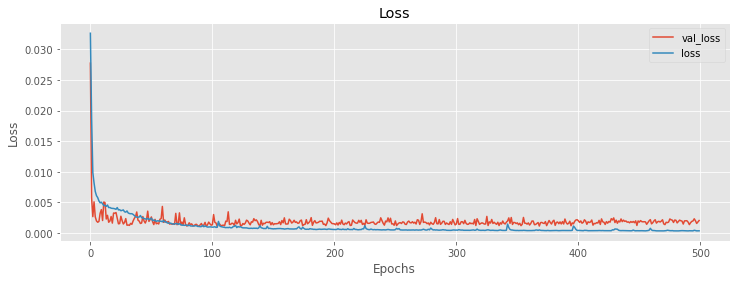

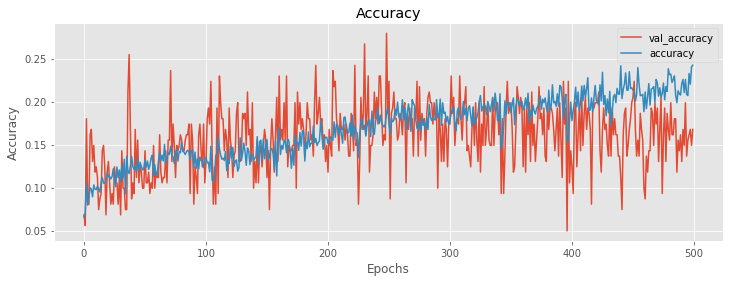

In [80]:
visualize_training_results(res)

Predicted Prices: 
 [[0.06350713]
 [0.06265861]
 [0.06182765]
 [0.06122473]
 [0.06068623]
 [0.05932979]
 [0.06026224]
 [0.05942112]
 [0.05940189]
 [0.06041428]]

Actual Prices: 
 [[0.070906], [0.068789], [0.072336], [0.086249], [0.074585], [0.086175], [0.083265], [0.087527], [0.073263], [0.078533]]


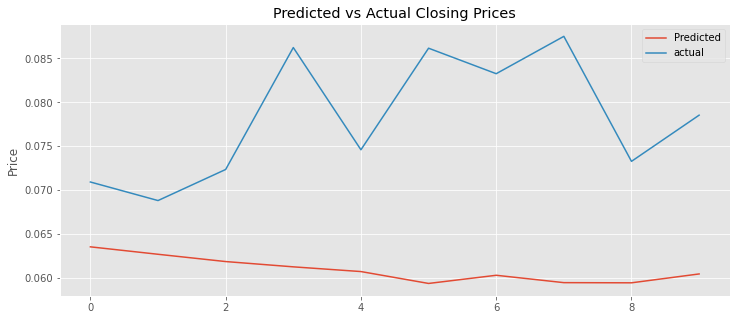

In [82]:
plt.figure(figsize=(12,5))

yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1))

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print('Predicted Prices: \n', yhat)
plt.plot(yhat, label = 'Predicted')

print('\nActual Prices: \n', actual.tolist())
plt.plot(actual.tolist(), label = 'actual')

plt.title(f'Predicted vs Actual Closing Prices')
plt.ylabel('Price')
plt.legend()
plt.savefig('BTC_Validation.png')
plt.show()

               Close
2022-05-10  0.087792
2022-05-11  0.087630
2022-05-12  0.087935
2022-05-13  0.085509
2022-05-14  0.084174
2022-05-15  0.083578
2022-05-16  0.083882
2022-05-17  0.084312
2022-05-18  0.083474
2022-05-19  0.083711


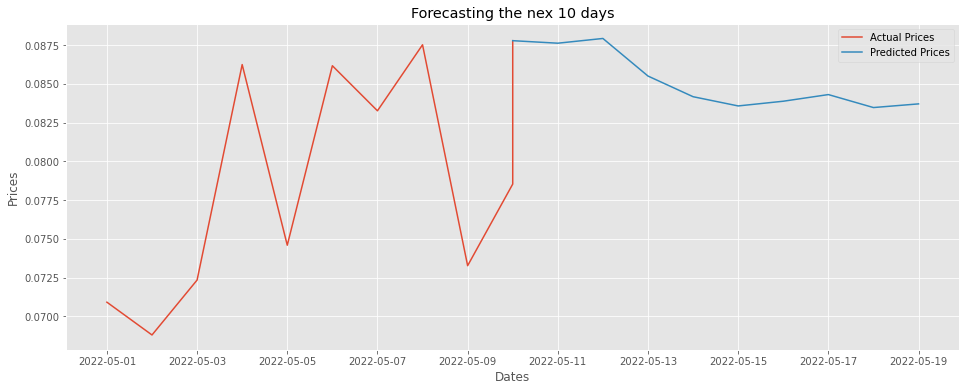

In [88]:
yhat = model.predict(np.array(trx.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, 
                     index = pd.date_range(start = trx.index[-1], 
                                           periods = len(yhat), freq = 'D'), 
                     columns = trx.columns)

print(preds)

pers = 10
#actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

actual = pd.DataFrame(scaler.inverse_transform(trx[['Close']].tail(pers)), 
                      index = trx.Close.tail(pers).index, 
                      columns = trx.columns).append(preds.head(1))

plt.figure(figsize = (16,6))
plt.plot(actual, label = 'Actual Prices')
plt.plot(preds, label = 'Predicted Prices')
plt.ylabel('Prices')
plt.xlabel('Dates')
plt.title(f'Forecasting the nex {len(yhat)} days')
plt.legend()
plt.savefig('TRX_Predictions.png')
plt.show()